# Factors that affect Crime Rate in Major Cities

#### IS590 Program Analysis Final Project 
###### Team member: Shuang Ke, Yiwen Wang, Xinrong Li

Chicago is the most populous city in Illinois, it is famous for its fancy skyscrapers, and is also notorious for its high crime rates. The city's overall crime rate, especially the violent crime rate, is higher than the US average. Finding the causes of crime could be the most effective process to reduce the crime rate.
 
Additional to Chicago, we would also analyze other major cities such as Los Angeles, New York City. We would analyze the relationship between crime and weather factors(temperature, humidity etc.), as well as the relationship between crime and air pollution. By doing this analysis, we can compare and determine which factors have greater impact on each city. 

To find out if there is any association bewteen weather and Crime, we come up with several hypothesis as following:



## Hypothesis 
- Temperature could be one of the factors that affect crimes in major cities. The frequency of crime is relatively high in warm seasons and low in cold seasons. 


- Air pollution could be one of the factors that affect crime rate. Server air pollution can trigger physical discomfort which could lead to antisocial behavior and induce aggression, thus increasing the crime rate.


- Humidity might have different degrees of influence on different types of crime. It might has greater impact on sexual crime.






Describe our dataset 

### Subtitle 

describe the method we use, how we analyze 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import add
from sklearn import preprocessing
from statsmodels.formula.api import ols
%matplotlib inline


from datetime import datetime

In [2]:
import FUNC

In [3]:
###Read data used to prove hypothesis 1

Humiditiy = FUNC.read_indata('./historical-hourly-weather-data/humidity.csv')
Pressure = FUNC.read_indata('./historical-hourly-weather-data/pressure.csv')
Temperature = FUNC.read_indata('./historical-hourly-weather-data/temperature.csv')
weather_description = FUNC.read_indata('./historical-hourly-weather-data/weather_description.csv')
wind_direction = FUNC.read_indata('./historical-hourly-weather-data/wind_direction.csv')
wind_speed = FUNC.read_indata('./historical-hourly-weather-data/wind_speed.csv')
chicago_crime = FUNC.read_indata('./Chicago_crime_2012-2017.csv')

In [4]:
## Make a list of weather dataframe, generate year, month, day columns in the weather dataframes 
df_list = [Humiditiy, Pressure, Temperature, wind_direction,wind_speed]
stringlist = ['Humiditiy', 'Pressure', 'Temperature', 'wind_direction', 'wind_speed']

for index in range(len(df_list)):
    df = FUNC.generate_year_month_day(df_list[index], 'datetime')


In [5]:
Humiditiy.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,year,month,day
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25.0,NaN,NaN,NaN,2012,10,1
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,68.0,50.0,63.0,22.0,51.0,51.0,50.0,2012,10,1
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,68.0,51.0,62.0,22.0,51.0,51.0,50.0,2012,10,1
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,68.0,51.0,62.0,22.0,51.0,51.0,50.0,2012,10,1
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,68.0,52.0,62.0,22.0,51.0,51.0,50.0,2012,10,1


In [6]:
new_df_list = FUNC.get_city_weather('Chicago', df_list, stringlist)
weather_all = FUNC.mergeall_weather(new_df_list, ['year', 'month', 'day'])

chicago_crime['year'] = chicago_crime.Date.str[6:10]
chicago_crime['month'] = chicago_crime.Date.str[0:2]
chicago_crime['day'] = chicago_crime.Date.str[3:5]


In [7]:
chicago_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,year,month,day
0,11002368,JA329407,01/01/2012 12:00:00 AM,021XX N KENNETH AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,NaN,NaN,2012,11/27/2017 03:53:35 PM,NaN,NaN,NaN,2012,01,01
1,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)",2012,01,01
2,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN,2012,01,01
3,9888481,HX538405,01/01/2012 12:00:00 AM,066XX S MAY ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,1169793.0,1860812.0,2012,02/09/2018 03:44:29 PM,41.773566,-87.653128,"(41.773566189, -87.653127978)",2012,01,01
4,10593543,HZ344934,01/01/2012 12:00:00 AM,064XX W BELLE PLAINE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,NaN,NaN,2012,07/12/2016 03:53:40 PM,NaN,NaN,NaN,2012,01,01


In [8]:
chi_crime_per_day = chicago_crime.groupby(['year', 'month', 'day', 'Primary Type', 'Arrest',  'Domestic']).size()
chi_crime_per_day= pd.DataFrame(chi_crime_per_day.reset_index())
chi_crime_per_day = chi_crime_per_day.rename(columns = {0:'Count'})
chi_crime_per_day[['year', 'month', 'day']] = chi_crime_per_day[['year', 'month', 'day']].astype(int)


In [9]:
chi_crime_per_day.head(20)

,year,month,day,Primary Type,Arrest,Domestic,Count
0,2012,1,1,ARSON,False,False,1
1,2012,1,1,ASSAULT,False,False,23
2,2012,1,1,ASSAULT,False,True,9
3,2012,1,1,ASSAULT,True,False,10
4,2012,1,1,ASSAULT,True,True,6
5,2012,1,1,BATTERY,False,False,96
6,2012,1,1,BATTERY,False,True,108
7,2012,1,1,BATTERY,True,False,30
8,2012,1,1,BATTERY,True,True,30
9,2012,1,1,BURGLARY,False,False,37


In [10]:
crime_weather= FUNC.merge_dataframe(weather_all,chi_crime_per_day,['year', 'month', 'day'])
crime_weather = crime_weather.dropna()
crime_weather['Temperature'] = crime_weather['Temperature'] - 273.15


In [11]:
### Merged dataset 
crime_weather.head(20)

,year,month,day,Humiditiy,Pressure,Temperature,wind_direction,wind_speed,Primary Type,Arrest,Domestic,Count
0,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,ARSON,False,False,4
1,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,ASSAULT,False,False,33
2,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,ASSAULT,False,True,9
3,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,ASSAULT,True,False,15
4,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,ASSAULT,True,True,3
5,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,BATTERY,False,False,57
6,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,BATTERY,False,True,45
7,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,BATTERY,True,False,16
8,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,BATTERY,True,True,20
9,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,BURGLARY,False,False,75


In [12]:
crime_subset = crime_weather[['year', 'month', 'day','Humiditiy', 'Count','Primary Type']].copy(deep = True)




In [13]:
crime_subset = FUNC.normalize_humidity(crime_subset, 'Humiditiy')
crime_subset.head()

,year,month,day,Humiditiy,Count,Primary Type
0,2012,10,1,0.575067,4,ARSON
1,2012,10,1,0.575067,33,ASSAULT
2,2012,10,1,0.575067,9,ASSAULT
3,2012,10,1,0.575067,15,ASSAULT
4,2012,10,1,0.575067,3,ASSAULT


In [15]:
crime_subset['Reltaive Humidity'] = crime_subset.apply(FUNC.vectorize_humidity, axis = 1)
crime_subset.head()

,year,month,day,Humiditiy,Count,Primary Type,Reltaive Humidity
0,2012,10,1,0.575067,4,ARSON,Normal
1,2012,10,1,0.575067,33,ASSAULT,Normal
2,2012,10,1,0.575067,9,ASSAULT,Normal
3,2012,10,1,0.575067,15,ASSAULT,Normal
4,2012,10,1,0.575067,3,ASSAULT,Normal


In [16]:
crime_count = pd.DataFrame(crime_subset.groupby(['Primary Type','Reltaive Humidity']).agg({'Count':np.sum}))
crime_count_total = crime_count.reset_index()

In [17]:
crime_count_total.head()

,Primary Type,Reltaive Humidity,Count
0,ARSON,High,1001
1,ARSON,Low,411
2,ARSON,Normal,823
3,ASSAULT,High,44198
4,ASSAULT,Low,16292


### Subtitle

In [18]:
Temp_sub = crime_weather[['year', 'month', 'day', 'Temperature', 'Count', 'Primary Type']].copy(deep=True)

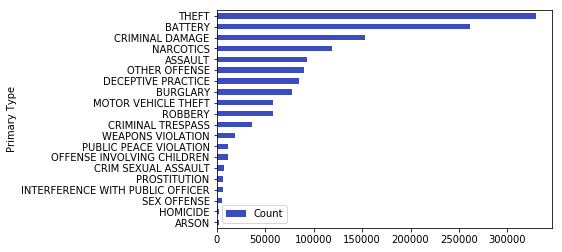

In [19]:
sort_crime_count = pd.DataFrame(Temp_sub.groupby(['Primary Type']).agg({'Count': np.sum}))

sort_crime_count = sort_crime_count.sort_values(by = "Count", ascending = True).tail(20)

sort_crime_count.plot(kind = 'barh',colormap= 'coolwarm')


In [20]:
avg_crime_count_bymonth = pd.DataFrame(Temp_sub.groupby(['Primary Type','month']).agg({'Count': np.sum}))

avg_crime_count_bymonth.head()


#avg_crime_count_byyear = pd.DataFrame(Temp_sub.groupby(['Primary Type','month', 'year']).agg({'Count': np.sum}))
#avg_crime_count_byyear.head(10)

assault_bymonth = avg_crime_count_bymonth.loc['ASSAULT'] / 5

narcotics_bymonth = avg_crime_count_bymonth.loc['NARCOTICS'] / 5

crimesex_bymonth = avg_crime_count_bymonth.loc['CRIM SEXUAL ASSAULT'] / 5
battery_bymonth = avg_crime_count_bymonth.loc['BATTERY'] / 5
theft_bymonth = avg_crime_count_bymonth.loc['THEFT'] / 5

### Mean temperature by month across 2013-2017
Temp_bymonth = Temp_sub.groupby('month').agg({'Temperature':np.mean})
Temp_bymonth


,Temperature
month,
1,-3.341509
2,-3.588281
3,1.982528
4,9.091234
5,14.866458
6,19.958908
7,22.574692
8,22.151078
9,19.674832


In [23]:
Temp_sub['Temprange'] = Temp_sub.apply(FUNC.vectorize_temperature, axis=1)

Temp_sub3 = pd.DataFrame(Temp_sub.groupby(['Primary Type','Temprange']).agg({'Count': np.sum}))

asc_temp_sub3 = Temp_sub3.sort_values(by = "Count", ascending = 0)

asc_temp_sub3.head()


Count
Primary Type Temprange       
THEFT        0-5        95265
BATTERY      0-5        73756
THEFT        20-25      69308
             15-20      58250
BATTERY      20-25      56699

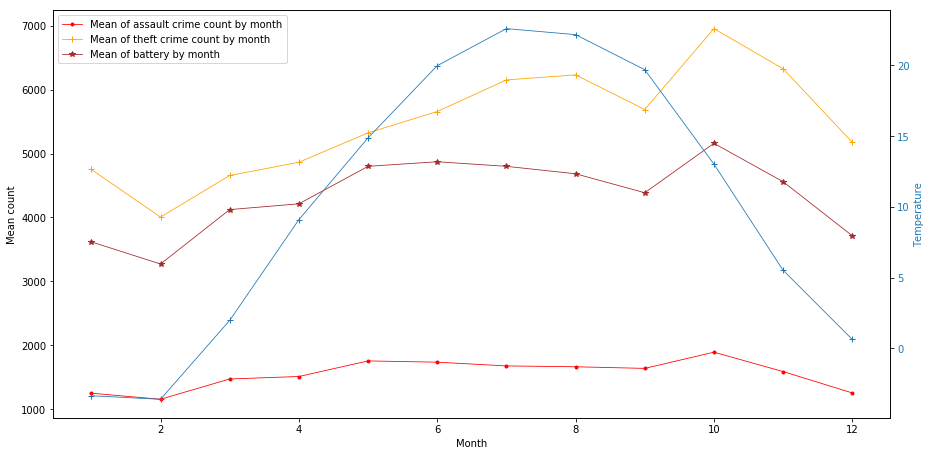

In [24]:
fig, ax1 = plt.subplots(figsize = (15,7.5))

ax1.plot(assault_bymonth , linewidth = 0.8, marker = '.', label = "Mean of assault crime count by month", color='Red')
ax1.plot(theft_bymonth, linewidth = 0.8, marker = '+', label = "Mean of theft crime count by month", color='Orange')
ax1.plot(battery_bymonth, linewidth = 0.8, marker = '*', label = "Mean of battery by month", color='Brown')

ax1.set_xlabel("Month") 
ax1.set_ylabel("Mean count") 
ax1.tick_params(axis='y')
ax1.legend()



ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(Temp_bymonth, linewidth = 0.8, marker = '+', label = "Mean of narcotics crime count by month", color='tab:blue')
ax2.tick_params(axis='y', labelcolor=color)




plt.show()

Describe the plot here 

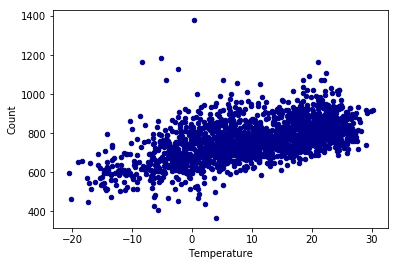

In [25]:
Temp_sub1 = pd.DataFrame(Temp_sub.groupby(['year','month','day']).agg({'Count': np.sum, 'Temperature': np.mean}))
Temp_sub1 = Temp_sub1.reset_index()

ax1 = Temp_sub1.plot.scatter(x='Temperature',y = 'Count',c = 'DarkBlue')
plt.show()

In [26]:

chicago_linear_model = ols("Count ~ Temperature", data=Temp_sub1).fit()
chicago_linear_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     812.3
Date:                Fri, 03 May 2019   Prob (F-statistic):          7.64e-149
Time:                        11:56:37   Log-Likelihood:                -11059.
No. Observations:                1885   AIC:                         2.212e+04
Df Residuals:                    1883   BIC:                         2.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     709.6562      2.740    258.960      0.000     704.282     715.031
Temperature     5.3223      0.187     28.500      0.000       4.956       5.689
==============================================================================
Omnibus:                      400.875   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1579.961
Skew:                           0.987   Prob(JB):                         0.00
Kurtosis:                       7.027   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

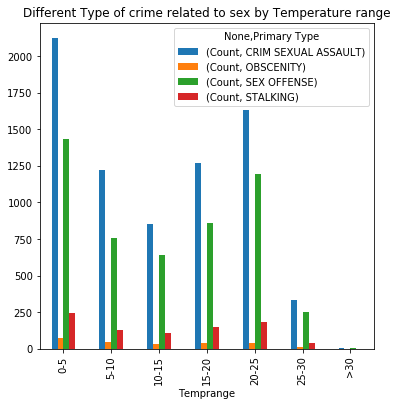

In [28]:
Temp_sub['Temprange'] = Temp_sub.apply(FUNC.vectorize_temperature, axis=1)

Temp_sub.head()

Temp_sexual3 = Temp_sub.loc[Temp_sub['Primary Type'].isin(['CRIM SEXUAL ASSAULT','OBSCENITY', 'SEX OFFENSE','STALKING'])]

Temp_sub3 =Temp_sexual3.groupby(['Temprange','Primary Type']).agg({'Count': np.sum}).unstack()

Temp_sub3 = Temp_sub3.reindex(index = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '>30'])


Temp_sub3
Temp_sub3.plot(kind = 'bar', title = "Different Type of crime related to sex by Temperature range", figsize=(6,6))
plt.xticks(rotation=90)



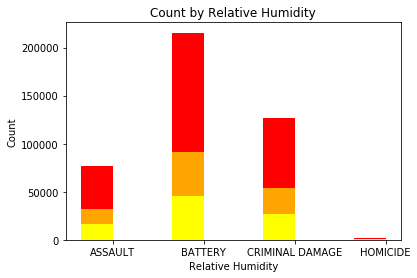

In [29]:
crime_count = crime_count_total.loc[crime_count_total['Primary Type'].isin(['ASSAULT','BATTERY', 'CRIMINAL DAMAGE','HOMICIDE'])]
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, LowCounts, width,color='Yellow')
p2 = ax.bar(ind, NormalCounts, width, color='Orange', bottom = LowCounts)
p3 = ax.bar(ind, HighCounts, width, color = 'Red', bottom = NormalCounts)
ax.set_ylabel('Count')
ax.set_xlabel('Relative Humidity')
ax.set_title('Count by Relative Humidity')
ax.set_xticks(ind + width / 2.)
#ax.set_yticks(np.arange(0, 81, 10))
ax.set_xticklabels(('ASSAULT','BATTERY', 'CRIMINAL DAMAGE','HOMICIDE'))
plt.show()

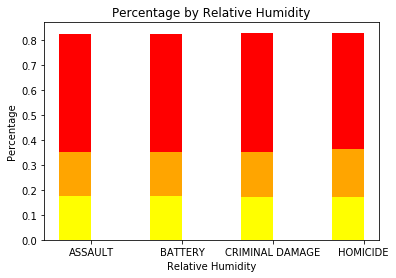

In [30]:
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
totalCounts = list(map(sum, zip(HighCounts,NormalCounts,LowCounts)))


Highpercent = [x/y for x, y in zip(HighCounts, totalCounts)]
Normalpercent = [x/y for x, y in zip(NormalCounts, totalCounts)]
Lowpercent = [x/y for x, y in zip(LowCounts, totalCounts)]
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, Lowpercent, width,color='Yellow')
p2 = ax.bar(ind, Normalpercent, width, color='Orange', bottom = Lowpercent)
p3 = ax.bar(ind, Highpercent, width, color = 'Red', bottom = Normalpercent)
ax.set_ylabel('Percentage')
ax.set_xlabel('Relative Humidity')
ax.set_title('Percentage by Relative Humidity')
ax.set_xticks(ind + width / 2.)
#ax.set_yticks(np.arange(0, 81, 10))
ax.set_xticklabels(('ASSAULT','BATTERY', 'CRIMINAL DAMAGE','HOMICIDE'))
plt.show()

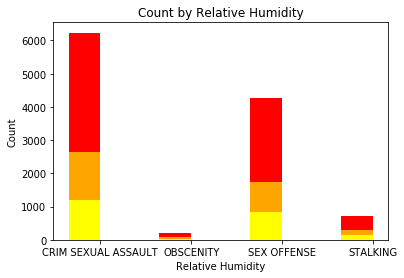

In [31]:
crime_count = crime_count_total.loc[crime_count_total['Primary Type'].isin(['CRIM SEXUAL ASSAULT','OBSCENITY', 'SEX OFFENSE','STALKING'])]
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, LowCounts, width,color='Yellow')
p2 = ax.bar(ind, NormalCounts, width, color='Orange', bottom = LowCounts)
p3 = ax.bar(ind, HighCounts, width, color = 'Red', bottom = NormalCounts)
ax.set_ylabel('Count')
ax.set_xlabel('Relative Humidity')
ax.set_title('Count by Relative Humidity')
ax.set_xticks(ind + width / 2.)
ax.set_xticklabels(('CRIM SEXUAL ASSAULT','OBSCENITY', 'SEX OFFENSE','STALKING'))
plt.show()

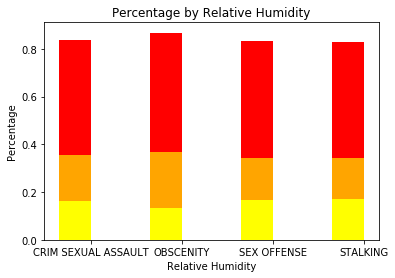

In [32]:
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
totalCounts = list(map(sum, zip(HighCounts,NormalCounts,LowCounts)))


Highpercent = [x/y for x, y in zip(HighCounts, totalCounts)]
Normalpercent = [x/y for x, y in zip(NormalCounts, totalCounts)]
Lowpercent = [x/y for x, y in zip(LowCounts, totalCounts)]
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, Lowpercent, width,color='Yellow')
p2 = ax.bar(ind, Normalpercent, width, color='Orange', bottom = Lowpercent)
p3 = ax.bar(ind, Highpercent, width, color = 'Red', bottom = Normalpercent)
ax.set_ylabel('Percentage')
ax.set_xlabel('Relative Humidity')
ax.set_title('Percentage by Relative Humidity')
ax.set_xticks(ind + width / 2.)
#ax.set_yticks(np.arange(0, 81, 10))
ax.set_xticklabels(('CRIM SEXUAL ASSAULT','OBSCENITY', 'SEX OFFENSE','STALKING'))
plt.show()

# LA

## 1. Temperature's effect on crime in LA

In [33]:
LA_crime =FUNC.read_indata('./LA_Crime_Data_2010_to_Present.csv')
LA_crime.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,61000673,04/07/2016,04/07/2016,2043,10,West Valley,1037,886,DISTURBING THE PEACE,1501,...,NaN,IC,Invest Cont,886.0,NaN,NaN,NaN,17100 VANOWEN ST,NaN,"(34.1939, -118.5055)"
1,131609876,04/02/2016,04/01/2016,1900,19,Mission,1902,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,13600 DRONEFIELD AV,NaN,"(34.3196, -118.4561)"
2,150319258,08/20/2016,08/20/2016,30,3,Southwest,325,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,NaN,AO,Adult Other,440.0,NaN,NaN,NaN,2800 MENLO AV,NaN,"(34.0294, -118.2903)"
3,151601466,01/01/2016,01/01/2016,2040,16,Foothill,1642,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0334 0411 1402,...,OTHER KNIFE,AA,Adult Arrest,230.0,998.0,NaN,NaN,10500 CAYUGA AV,NaN,"(34.2606, -118.4238)"
4,151601467,01/02/2016,01/02/2016,30,16,Foothill,1668,624,BATTERY - SIMPLE ASSAULT,0416,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,9800 MARCUS AV,NaN,"(34.2463, -118.2818)"


In [34]:
LA_monthly_crime=FUNC.crime_count(LA_crime,'Date Occurred','month')
LA_monthly_crime.head()

count
year month       
2012 1      17745
     2      15316
     3      16562
     4      16275
     5      17466

In [35]:
LA_temp=FUNC.city_temp_Celsius(Temperature,'Los Angeles')
LA_temp.head()

C:\Users\yiwen\PycharmProjects\Final_Project\FUNC.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  city_temp[city]=city_temp[city]-273.5


,Los Angeles,year,month,day
0,NaN,2012,10,1
1,18.370000,2012,10,1
2,18.368186,2012,10,1
3,18.362844,2012,10,1
4,18.357503,2012,10,1


In [36]:
LA_temp_avg_month=FUNC.average_temp(LA_temp,'Los Angeles','month')
LA_temp_avg_month.head()

,year,month,mean_temp
0,2012,10,19.755154
1,2012,11,15.776347
2,2012,12,12.739209
3,2013,1,11.242942
4,2013,2,12.234333


In [37]:
LA_crime_year_month=LA_crime[['year','month','DR Number']].groupby(['year', 'month']).count().reset_index().rename(columns={'DR Number':'count'})
LA_crime_year_month.head()

,year,month,count
0,2010,1,19362
1,2010,2,15999
2,2010,3,18107
3,2010,4,17743
4,2010,5,17697


In [39]:
LA_crime_weather_month= FUNC.merge_dataframe(LA_crime_year_month,LA_temp_avg_month,['year', 'month'])
LA_crime_weather_month=LA_crime_weather_month.dropna()
LA_crime_weather_month['year_month']=LA_crime_weather_month['year'].astype(str)+'-'+LA_crime_weather_month['month'].astype(str)
LA_crime_weather_month.head()

,year,month,count,mean_temp,year_month
33,2012,10,17207,19.755154,2012-10
34,2012,11,15750,15.776347,2012-11
35,2012,12,16270,12.739209,2012-12
36,2013,1,16623,11.242942,2013-1
37,2013,2,14037,12.234333,2013-2


Compare the line plot of monthly crime numbers and monthly average temperature. The x-axis represents the month and year, the left y-axis represents the total crime number in that month, the right y-axis represents the average temperature in that month. From the plot we can see the fluctuation of the crime count and the temperature are parellel in some parts, so we assume there might be some connections betweeen the crime count and the temperature in LA. While from the line plot we can't see the connection very clearly, we need a futher analysis.  

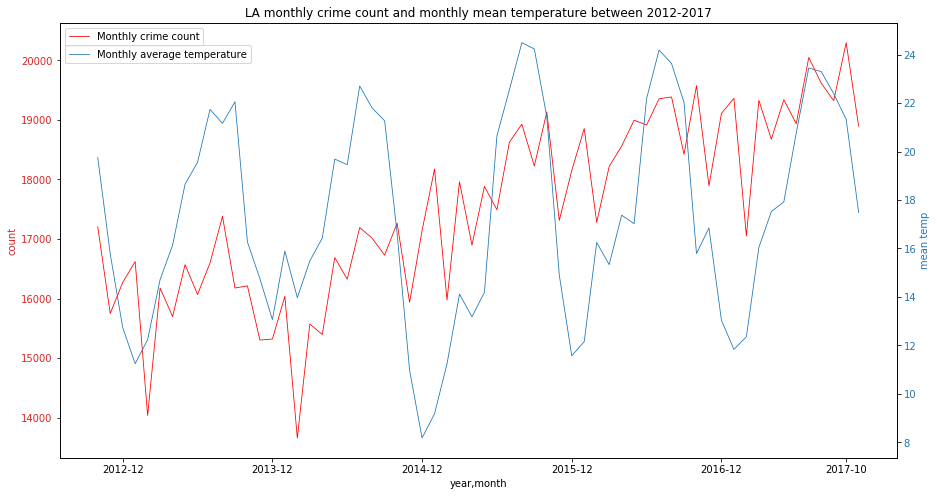

In [40]:
fig, ax1 = plt.subplots(figsize = (15,8))
color = 'tab:red'
ax1.set_xlabel('year,month')
ax1.set_ylabel('count', color=color)
ax1.plot(LA_crime_weather_month['year_month'], LA_crime_weather_month['count'], linewidth = 0.8,label = "Monthly crime count", color='Red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('mean temp', color=color)  
ax2.plot(LA_crime_weather_month['year_month'], LA_crime_weather_month['mean_temp'],linewidth = 0.8,label = "Monthly average temperature",color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('LA monthly crime count and monthly mean temperature between 2012-2017')
ax1.legend()
ax2.legend(bbox_to_anchor=(0.234,0.96))

plt.xticks(['2012-12','2013-12','2014-12','2015-12','2016-12','2017-10'])
plt.show()


In [41]:
LA_temp_avg_day=FUNC.average_temp(LA_temp,'Los Angeles','day')
LA_temp_avg_day.head()

,year,month,day,mean_temp
0,2012,10,1,18.346501
1,2012,10,2,22.390450
2,2012,10,3,25.508542
3,2012,10,4,22.497917
4,2012,10,5,19.448333


In [42]:
LA_daily_crime=FUNC.crime_count(LA_crime,'Date Occurred','day')
LA_daily_crime.head()

count
year month day       
2012 1     1     1742
           2      476
           3      554
           4      530
           5      519

In [44]:
LA_crime_weather_day=pd.merge(LA_daily_crime, LA_temp_avg_day,on=['year', 'month','day'])
LA_crime_weather_day.head()

,year,month,day,count,mean_temp
0,2012,10,1,872,18.346501
1,2012,10,2,547,22.390450
2,2012,10,3,546,25.508542
3,2012,10,4,498,22.497917
4,2012,10,5,625,19.448333


The scatter plot of the daily crime count and the daily temperature

In [45]:
LA_crime_weather_day.corr() 

,year,month,day,count,mean_temp
year,1.000000,-0.155733,-0.001335,0.466587,0.140768
month,-0.155733,1.000000,0.010371,0.028733,0.193783
day,-0.001335,0.010371,1.000000,-0.140536,0.024962
count,0.466587,0.028733,-0.140536,1.000000,0.180641
mean_temp,0.140768,0.193783,0.024962,0.180641,1.000000


Text(0, 0.5, 'daily crime')

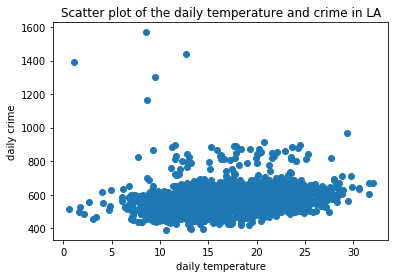

In [46]:
plt.scatter(LA_crime_weather_day['mean_temp'], LA_crime_weather_day['count'])
plt.title('Scatter plot of the daily temperature and crime in LA')
plt.xlabel('daily temperature')
plt.ylabel('daily crime')

Apply a linear analysis on the daily crime count and daily temperature between 2010-10 to 2017-10.

In [47]:
LA_temp_linear_model = ols("count ~ mean_temp", data=LA_crime_weather_day).fit()
LA_temp_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     63.58
Date:                Fri, 03 May 2019   Prob (F-statistic):           2.64e-15
Time:                        11:57:54   Log-Likelihood:                -11037.
No. Observations:                1887   AIC:                         2.208e+04
Df Residuals:                    1885   BIC:                         2.209e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    521.9858      7.023     74.326      0.000     508.212     535.759
mean_temp      3.1033      0.389      7.974      0.000       2.340       3.867
==============================================================================
Omnibus:                     1543.782   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72245.636
Skew:                           3.494   Prob(JB):                         0.00
Kurtosis:                      32.497   Cond. No.                         65.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.Temperature's effect on different kind of crimes in LA 

In [48]:
LA_crime_type=LA_crime[['Crime Code Description','DR Number']].groupby(['Crime Code Description']).count().reset_index().rename(columns={'DR Number':'count'})
LA_crime_type.sort_values(by = "count", ascending = 0).head()

,Crime Code Description,count
5,BATTERY - SIMPLE ASSAULT,176948
22,BURGLARY FROM VEHICLE,150446
135,VEHICLE - STOLEN,149165
118,THEFT PLAIN - PETTY ($950 & UNDER),138790
21,BURGLARY,138790


In [49]:
LA_crime_type['Crime Code Description'].count()
LA_crime_type['Crime Code Description'][1]
if 'A' in LA_crime['Crime Code Description'][1]:
    LA_crime['Crime Code Description'][1]='A' 

In [50]:
def normalize_crime_type(df):
    """
    """
    index=df.index
    for i in index:
        if 'STOLEN' in df[i]:
            df[i]='STOLEN'
        elif 'THEFT' in df[i]:
            df[i]='THEFT'
        elif 'BATTERY' in df[i]:
            df[i]='BATTERY'
        elif 'ASSULT' in df[i]:
            df[i]='ASSULT'
        elif 'VANDALISM' in df[i]:
            df[i]='VANDALISM'
        elif 'VIOLATION' in df[i]:
            df[i]='VIOLATION'
        else:
            continue
    return df

In [51]:
LA_crime_type_monthly=LA_crime[['year','month','Crime Code Description','DR Number']].groupby(['year', 'month','Crime Code Description']).count().reset_index().rename(columns={'DR Number':'count'})
LA_crime_type_monthly.head()

,year,month,Crime Code Description,count
0,2010,1,ARSON,33
1,2010,1,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,9
2,2010,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",720
3,2010,1,ATTEMPTED ROBBERY,131
4,2010,1,BATTERY - SIMPLE ASSAULT,1689


## New York City 

## 1. Temperature's effect on crimes in New York City 

In [52]:
NY_crime=FUNC.read_indata('./NYPD_Complaint_Data_Historic.csv')
NY_crime.head()

C:\Program Files\Python37\lib\site-packages\IPython\core\interactiveshell.py:2809: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,789626784,04/24/2015,00:01:00,NaN,NaN,105.0,04/27/2015,578,HARRASSMENT 2,638.0,...,F,NaN,40.660029,-73.739577,"(40.660028593, -73.739576566)",PATROL BORO QUEENS SOUTH,NaN,25-44,BLACK,F
1,939665334,04/23/2015,22:00:00,04/23/2015,22:10:00,13.0,04/27/2015,109,GRAND LARCENY,418.0,...,NaN,NaN,40.733933,-73.977327,"(40.73393308, -73.977326958)",PATROL BORO MAN SOUTH,NaN,45-64,UNKNOWN,F
2,414873301,04/23/2015,21:35:00,04/24/2015,13:59:00,73.0,04/27/2015,109,GRAND LARCENY,422.0,...,NaN,NaN,40.673844,-73.916732,"(40.673844225, -73.916732256)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,F
3,879233701,04/23/2015,19:45:00,NaN,NaN,43.0,04/27/2015,341,PETIT LARCENY,338.0,...,U,NaN,40.823500,-73.858619,"(40.823499964, -73.858618987)",PATROL BORO BRONX,NaN,NaN,UNKNOWN,D
4,236156807,04/23/2015,19:21:00,04/25/2015,20:08:00,34.0,04/27/2015,126,MISCELLANEOUS PENAL LAW,198.0,...,M,NaN,40.851112,-73.935256,"(40.851111636, -73.935255912)",PATROL BORO MAN NORTH,NaN,25-44,BLACK,F


In [53]:
NY_monthly_crime=FUNC.crime_count(NY_crime, 'RPT_DT','month')
NY_monthly_crime.head()

count
year month       
2012 1      41569
     2      39248
     3      43539
     4      41721
     5      44949

In [54]:
NY_temp=FUNC.city_temp_Celsius(Temperature,'New York')
NY_temp.head()

C:\Users\yiwen\PycharmProjects\Final_Project\FUNC.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  city_temp[city]=city_temp[city]-273.5


,New York,year,month,day
0,NaN,2012,10,1
1,14.720000,2012,10,1
2,14.747676,2012,10,1
3,14.826940,2012,10,1
4,14.906203,2012,10,1


In [55]:
NY_monthly_avg_temp=FUNC.average_temp(NY_temp,'New York','month')
NY_monthly_avg_temp.head()

,year,month,mean_temp
0,2012,10,14.040227
1,2012,11,5.595819
2,2012,12,4.322878
3,2013,1,0.776306
4,2013,2,0.262894


In [57]:
NY_crime_weather_monthly= FUNC.merge_dataframe(NY_monthly_crime,NY_monthly_avg_temp,['year', 'month'])
NY_crime_weather_monthly=NY_crime_weather_monthly.dropna()
NY_crime_weather_monthly.head()

,year,month,count,mean_temp
9,2012,10,41908,14.040227
10,2012,11,35491,5.595819
11,2012,12,38897,4.322878
12,2013,1,40357,0.776306
13,2013,2,35364,0.262894


In [58]:
NY_crime_weather_monthly['year_month']=NY_crime_weather_monthly['year'].astype(str)+'-'+NY_crime_weather_monthly['month'].astype(str)
NY_crime_weather_monthly.head()

,year,month,count,mean_temp,year_month
9,2012,10,41908,14.040227,2012-10
10,2012,11,35491,5.595819,2012-11
11,2012,12,38897,4.322878,2012-12
12,2013,1,40357,0.776306,2013-1
13,2013,2,35364,0.262894,2013-2


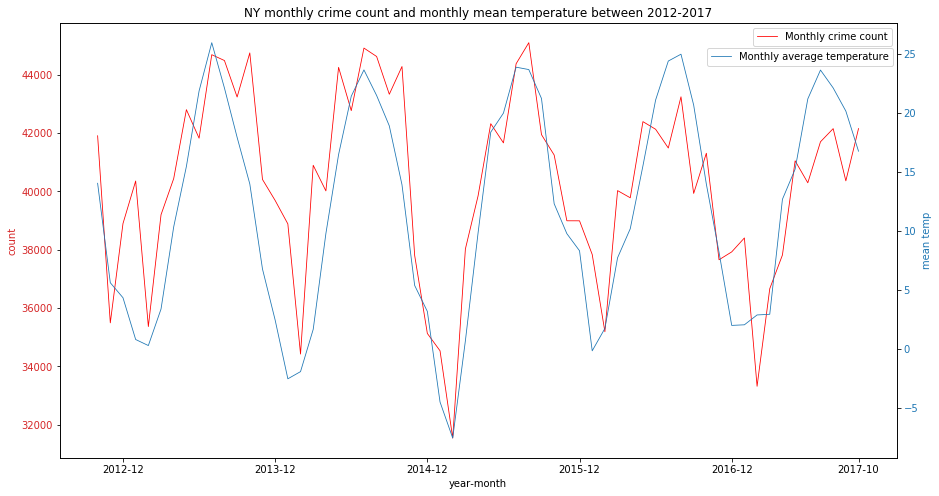

In [59]:
fig, ax1 = plt.subplots(figsize = (15,8))
color = 'tab:red'
ax1.set_xlabel('year-month')
ax1.set_ylabel('count', color=color)
ax1.plot(NY_crime_weather_monthly['year_month'], NY_crime_weather_monthly['count'], linewidth = 0.8,label = "Monthly crime count", color='Red')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('mean temp', color=color)  
ax2.plot(NY_crime_weather_monthly['year_month'], NY_crime_weather_monthly['mean_temp'],linewidth = 0.8,label = "Monthly average temperature",color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(['2012-12','2013-12','2014-12','2015-12','2016-12','2017-10'])
plt.title('NY monthly crime count and monthly mean temperature between 2012-2017')
ax1.legend()
ax2.legend(bbox_to_anchor=(0.768,0.89))

plt.show()

In [60]:
NY_daily_crime=FUNC.crime_count(NY_crime, 'RPT_DT','day')
NY_daily_crime.head()

count
year month day       
2012 1     1     1312
           2     1085
           3     1318
           4     1276
           5     1425

In [61]:
NY_daily_temp=FUNC.average_temp(NY_temp,'New York','day')
NY_daily_temp.head()

,year,month,day,mean_temp
0,2012,10,1,15.069420
1,2012,10,2,17.392389
2,2012,10,3,16.565625
3,2012,10,4,18.487083
4,2012,10,5,20.543542


In [62]:
NY_crime_weather_day=pd.merge(NY_daily_crime, NY_daily_temp,on=['year', 'month','day'])
NY_crime_weather_day.head()

,year,month,day,count,mean_temp
0,2012,10,1,1327,15.069420
1,2012,10,2,1419,17.392389
2,2012,10,3,1553,16.565625
3,2012,10,4,1599,18.487083
4,2012,10,5,1601,20.543542


In [63]:
NY_crime_weather_day[['count','mean_temp']].corr() 

,count,mean_temp
count,1.000000,0.515759
mean_temp,0.515759,1.000000


Text(0, 0.5, 'daily crime')

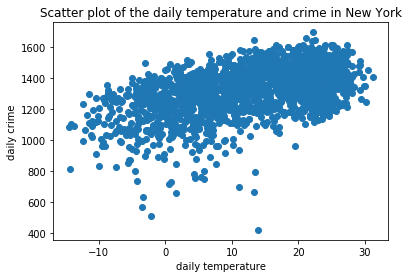

In [64]:
plt.scatter(NY_crime_weather_day['mean_temp'], NY_crime_weather_day['count'])
plt.title('Scatter plot of the daily temperature and crime in New York')
plt.xlabel('daily temperature')
plt.ylabel('daily crime')

In [65]:
NY_temp_linear_model = ols("count ~ mean_temp", data=NY_crime_weather_day).fit()
NY_temp_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     671.2
Date:                Fri, 03 May 2019   Prob (F-statistic):          1.53e-126
Time:                        11:58:57   Log-Likelihood:                -11733.
No. Observations:                1854   AIC:                         2.347e+04
Df Residuals:                    1852   BIC:                         2.348e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1222.9794      4.978    245.666      0.000    1213.216    1232.743
mean_temp      8.3894      0.324     25.907      0.000       7.754       9.025
==============================================================================
Omnibus:                      332.624   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.005
Skew:                          -0.993   Prob(JB):                    1.27e-171
Kurtosis:                       5.498   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""